**Import Images**

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

# Common
import os 
import keras 
import numpy as np
import tensorflow as tf

# Data Loading
from keras.preprocessing.image import ImageDataGenerator

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt

# Model 
import tensorflow_hub as hub
from keras.models import Sequential, load_model
from keras.layers import Dense

# Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Optimizer
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
train_path="/content/drive/MyDrive/CAS_M3/Train"
test_path="/content/drive/MyDrive/CAS_M3/Test"
val_path="/content/drive/MyDrive/CAS_M3/Validation"


Upload training set

In [ ]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr= cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

In [ ]:
#x_train

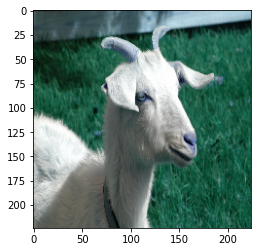

In [ ]:
plt.imshow(x_train[7])

Upload validation set

In [ ]:
x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

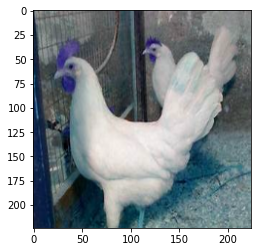

In [ ]:
plt.imshow(x_val[3])

Upload test set

In [ ]:
x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))
        
        x_test.append(img_arr)

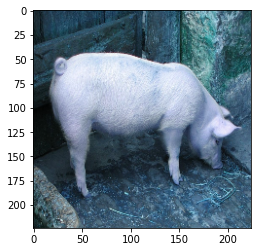

In [ ]:
plt.imshow(x_test[3])

In [ ]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
#val_x=val_x/255.0

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode='categorical')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 923 images belonging to 11 classes.
Found 282 images belonging to 11 classes.
Found 230 images belonging to 11 classes.


In [ ]:
train_y= training_set.classes
test_y= test_set.classes
val_y=val_set.classes

In [ ]:
training_set.class_indices

{'camel': 0,
 'cat': 1,
 'chicken': 2,
 'cow': 3,
 'dog': 4,
 'donkey': 5,
 'goat': 6,
 'horse': 7,
 'pig': 8,
 'sheep': 9,
 'turkey': 10}

In [ ]:
train_y.shape,test_y.shape,val_y.shape

((923,), (282,), (230,))

Tutorial followed for data visualization: 
https://www.kaggle.com/code/utkarshsaxenadn/bird-species-classification-with-big-transfer-bit

In [ ]:
# Get Class Names
class_names = sorted(os.listdir(train_path))
n_classes = len(class_names)
print(f"Number of Classes : {n_classes}.\nClasss : \n{class_names}")

Number of Classes : 11.
Classs : 
['camel', 'cat', 'chicken', 'cow', 'dog', 'donkey', 'goat', 'horse', 'pig', 'sheep', 'turkey']


We have 11 Classes, now the Class Distribution will decide which model to use.

In [ ]:
# Calculate Class Distribution
class_dis = [len(os.listdir(train_path + f"/{name}")) for name in class_names]

In [ ]:
# Plot Class Distribution
fig = px.bar(y=class_names, x=class_dis, title="Training Class Distribution", height=1500, color=class_names)
fig.update_layout({'title':{'x':0.5}})
fig.show()


In [ ]:
average_n_images_per_class = int(np.mean(class_dis))
print(f"Average Number of Images Per Class : {average_n_images_per_class}")

Average Number of Images Per Class : 83


Looking at the number of images we have per class in the test one

In [ ]:
# Calculate Class Distribution
class_dis_test = [len(os.listdir(test_path + f"/{name}")) for name in class_names]

In [ ]:
# Plot Class Distribution test
fig = px.bar(y=class_names, x=class_dis_test, title="Test Class Distribution", height=1500, color=class_names)
fig.update_layout({'title':{'x':0.5}})
fig.show()

In [ ]:
average_n_images_per_class_test = int(np.mean(class_dis_test))
print(f"Average Number of Images Per Class in test : {average_n_images_per_class_test}")

Average Number of Images Per Class in test : 25


For the validation

In [ ]:
# Calculate Class Distribution
class_dis_val = [len(os.listdir(val_path + f"/{name}")) for name in class_names]

In [ ]:
fig = px.bar(y=class_names, x=class_dis_val, title="Validation Class Distribution", height=1500, color=class_names)
fig.update_layout({'title':{'x':0.5}})
fig.show()

In [ ]:
average_n_images_per_class_val = int(np.mean(class_dis_val))
print(f"Average Number of Images Per Class in validation : {average_n_images_per_class_val}")

Average Number of Images Per Class in validation : 20


As we can see that all the classes are not equally distributed but on an average the class distribution is the same. The number of images assigned to each class is very low (on average 104) due to which it can be tough for the model to learn the data effectively. 

**Data Preparation **

So we are not aware of the Data/Class Distribution, it's time to load the data and apply some **preprocessing**.

In [ ]:
BATCH_SIZE = 32

# Initialize Data Generator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

# Load Data
train_ds = train_datagen.flow_from_directory(train_path,
                                                 target_size=(224,224), 
                                                 shuffle=True, 
                                                 batch_size=BATCH_SIZE, 
                                                 class_mode='binary')
test_ds = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224), 
                                            shuffle=True, 
                                            batch_size=BATCH_SIZE, 
                                            class_mode='binary')

val_ds = test_datagen.flow_from_directory(val_path,
                                            target_size=(224,224), 
                                            shuffle=True, 
                                            batch_size=BATCH_SIZE, 
                                            class_mode='binary')

Found 923 images belonging to 11 classes.
Found 282 images belonging to 11 classes.
Found 230 images belonging to 11 classes.


**Data Visualization**

In [ ]:
def show_images(data, GRID=(5,6), model=None, figsize=(25,30)):
    # Plot Configurations
    n_rows, n_cols = GRID
    n_images = n_rows * n_cols
    plt.figure(figsize=figsize)
    
    # Loop to plot all images
    i=1
    for images, labels in iter(data):
        
        # Select Random Images
        id = np.random.randint(len(images))
        image, label = images[id], class_names[int(labels[id])]
        
        # Plot Image
        plt.subplot(n_rows, n_cols, i)
        plt.imshow(image)
        plt.axis('off')
        
        # Make Prediction if model is given
        if model is not None:
            pred = class_names[np.argmax(model.predict(image[np.newaxis,...]))]
            title = f"True : {label}\nPred : {pred}"
        else:
            title = f"True : {label}"
        
        plt.title(title)
        
        # Break loop
        i+=1
        if i>n_images:
            break
    plt.show()

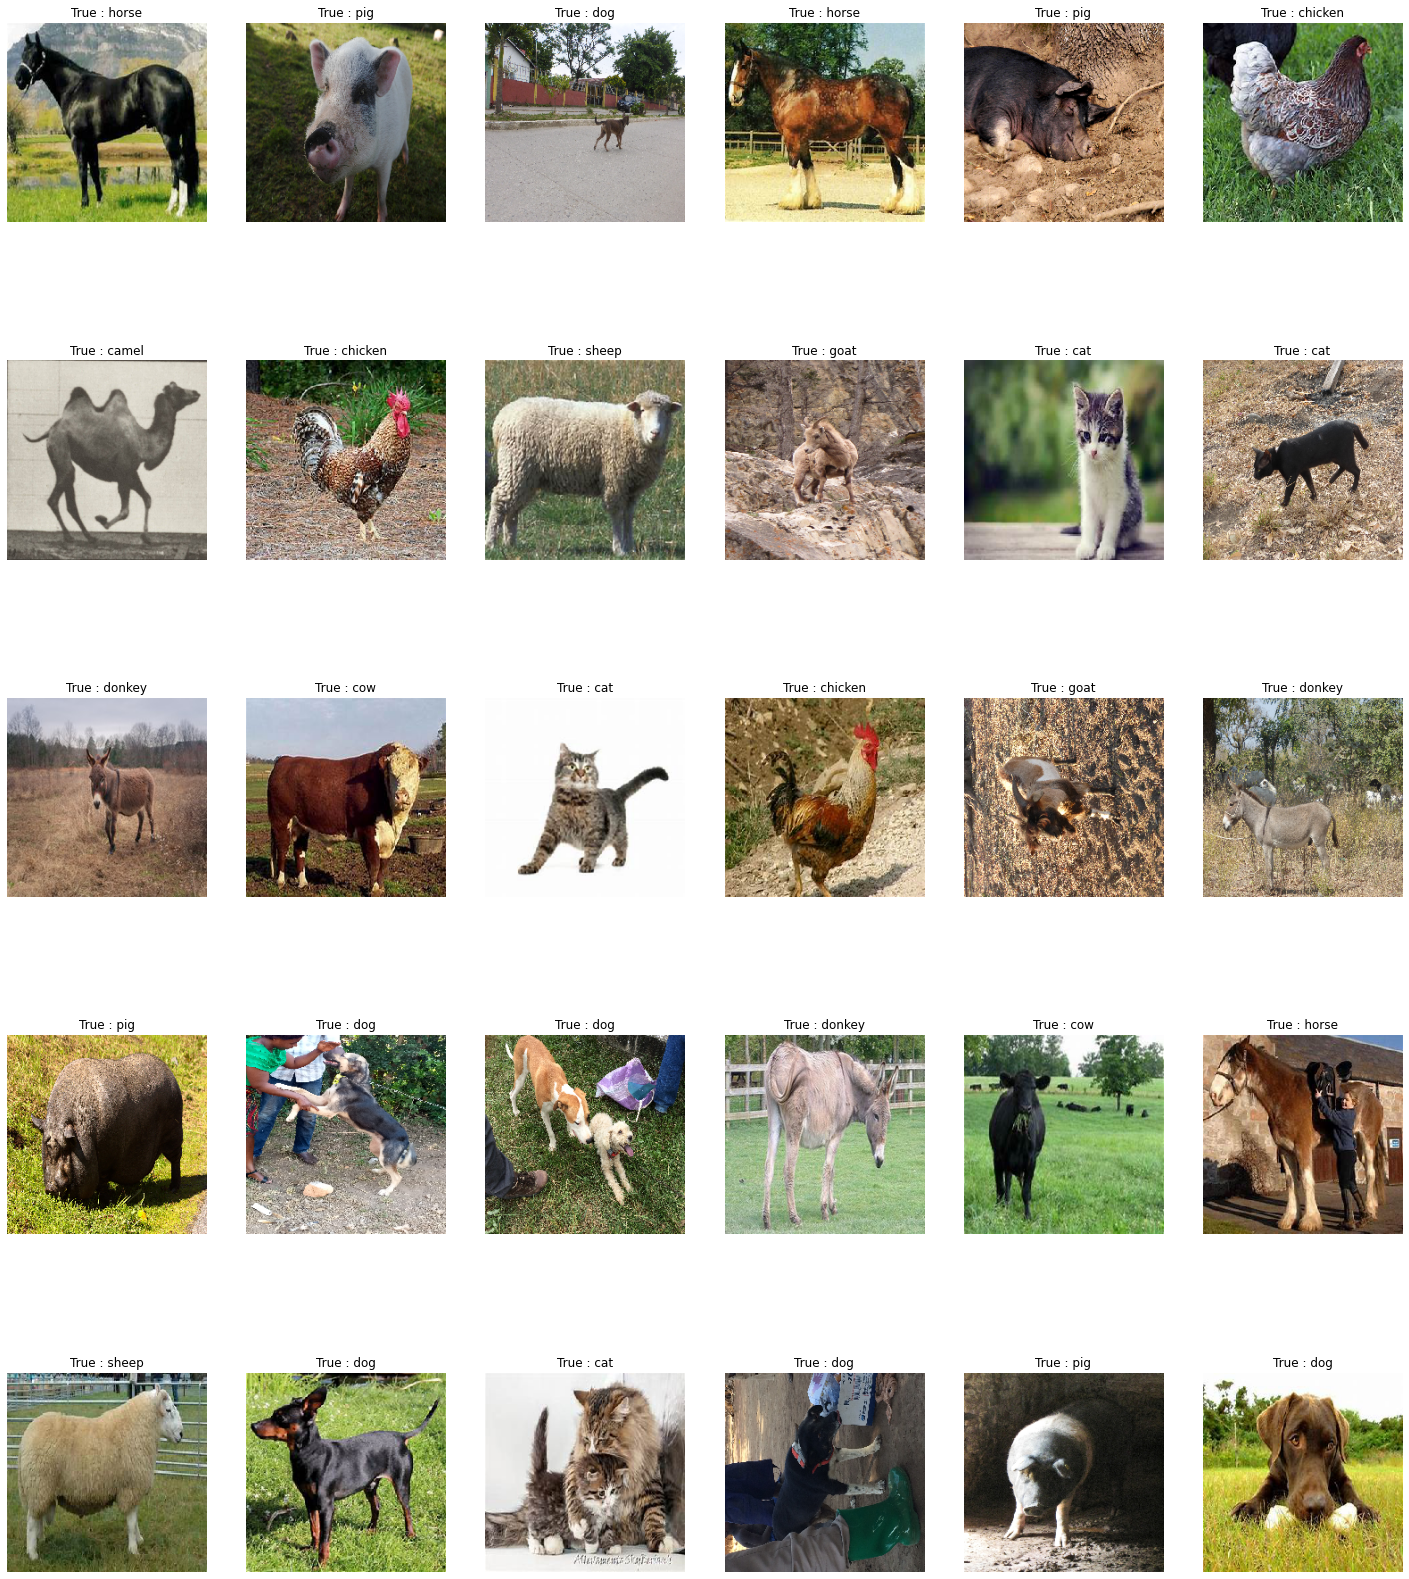

In [ ]:
show_images(data=train_ds)

**2. Model training**

Tutorial followed: https://www.kaggle.com/code/ahmednobi/bird-species-classification


In [ ]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
batch_size = 32
image_width = 224
image_height = 224

In [ ]:
labels = [x for x in os.listdir(train_path)]

In [ ]:
MobileNet_model = keras.applications.MobileNetV3Small(input_shape=(image_width, image_height, 3),
                                            classes=11,
                                            include_top=False,
                                            weights='imagenet')

4334752/4334752 [==============================] - 0s 0us/step


In [ ]:
MobileNet_model.trainable = False
MobileNet_model.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

In [ ]:
num_classes = len(labels)

inputs = keras.Input(shape=(image_width, image_height, 3))
x = keras.applications.mobilenet_v3.preprocess_input(inputs)
x = MobileNet_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)

outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
model1 = keras.Model(inputs, outputs)

In [ ]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 576)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 11)                6347      
                                                                 
Total params: 945,467
Trainable params: 6,347
Non-trainable p

In [ ]:

initial_epochs = 100

early_stop = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)

MobileNet = model1.fit(train_ds, 
          validation_data=val_ds,
          epochs=initial_epochs,
          callbacks=[early_stop])

Epoch 1/100
29/29 [==============================] - 70s 2s/step - loss: 2.4456 - accuracy: 0.0986 - val_loss: 2.3052 - val_accuracy: 0.1870
Epoch 2/100
29/29 [==============================] - 54s 2s/step - loss: 2.3364 - accuracy: 0.1690 - val_loss: 2.2999 - val_accuracy: 0.1870
Epoch 3/100
29/29 [==============================] - 53s 2s/step - loss: 2.3466 - accuracy: 0.1679 - val_loss: 2.2994 - val_accuracy: 0.1870
Epoch 4/100
29/29 [==============================] - 56s 2s/step - loss: 2.3300 - accuracy: 0.1679 - val_loss: 2.2965 - val_accuracy: 0.1870
Epoch 5/100
29/29 [==============================] - 53s 2s/step - loss: 2.3215 - accuracy: 0.1928 - val_loss: 2.2933 - val_accuracy: 0.1870
Epoch 6/100
29/29 [==============================] - 52s 2s/step - loss: 2.3354 - accuracy: 0.1603 - val_loss: 2.2909 - val_accuracy: 0.1870
Epoch 7/100
29/29 [==============================] - 52s 2s/step - loss: 2.3324 - accuracy: 0.1788 - val_loss: 2.2893 - val_accuracy: 0.1870
Epoch 8/100
2

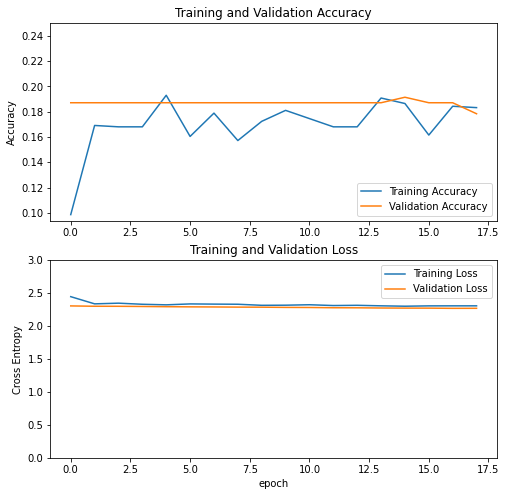

In [ ]:
initial_epochs = len(MobileNet.history['accuracy'])
acc = MobileNet.history['accuracy']
val_acc = MobileNet.history['val_accuracy']

loss = MobileNet.history['loss']
val_loss = MobileNet.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),0.25])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
test_ds_unbatch = tf.keras.utils.image_dataset_from_directory(
    test_path,
    seed=None,
    shuffle=False,
    image_size=(image_height, image_width),
    batch_size=image_height,
)
images = list(test_ds_unbatch.map(lambda x, y: x))
labels = list(test_ds_unbatch.map(lambda x, y: y))
y_test = np.concatenate([y for x, y in test_ds_unbatch], axis=0)
prediction = model1.predict(test_ds_unbatch)
pred = np.argmax(prediction,axis=1)
print(pred)
accuracy_score(pred,y_test)

Found 282 files belonging to 11 classes.
2/2 [==============================] - 10s 1s/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]


0.024822695035460994

Our accuracy is super low = 0.0425531914893617 = 4% 

Let's try a VG19 model to see if the accuracy differs 

In [ ]:
VGG19_model = keras.applications.vgg19.VGG19(input_shape=(image_width, image_height, 3),
                                            classes=400,
                                            include_top=False,
                                            weights='imagenet')

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
VGG19_model.trainable = False
VGG19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
inputs = keras.Input(shape=(image_width, image_height, 3))
x = keras.applications.vgg19.preprocess_input(inputs)
x = VGG19_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)

outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
model2 = keras.Model(inputs, outputs)

In [ ]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 512)               0   

In [ ]:
initial_epochs = 100

early_stop = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)
vgg19 = model2.fit(train_ds, 
          validation_data=val_ds,
          epochs=initial_epochs,
          callbacks=[early_stop])

Epoch 1/100
29/29 [==============================] - 793s 27s/step - loss: 3.7175 - accuracy: 0.1138 - val_loss: 2.8252 - val_accuracy: 0.1130
Epoch 2/100
29/29 [==============================] - 799s 28s/step - loss: 2.7116 - accuracy: 0.1289 - val_loss: 2.3529 - val_accuracy: 0.1522
Epoch 3/100
29/29 [==============================] - 804s 28s/step - loss: 2.4448 - accuracy: 0.1549 - val_loss: 2.3064 - val_accuracy: 0.1870
Epoch 4/100
29/29 [==============================] - 801s 28s/step - loss: 2.4021 - accuracy: 0.1571 - val_loss: 2.3036 - val_accuracy: 0.1870
Epoch 5/100
29/29 [==============================] - 801s 28s/step - loss: 2.4031 - accuracy: 0.1636 - val_loss: 2.3061 - val_accuracy: 0.1870


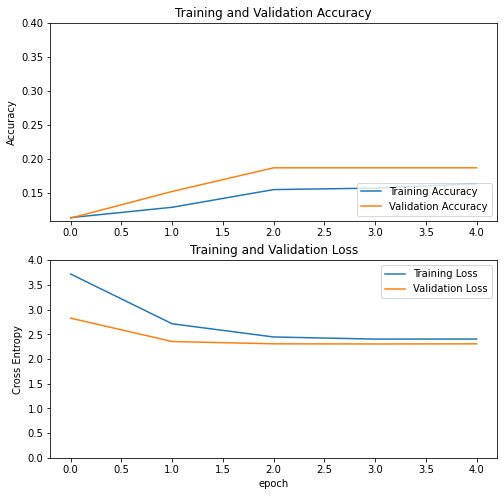

In [ ]:
initial_epochs = len(vgg19.history['accuracy'])
acc = vgg19.history['accuracy']
val_acc = vgg19.history['val_accuracy']

loss = vgg19.history['loss']
val_loss = vgg19.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),0.4])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,4])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
test_ds_unbatch = tf.keras.utils.image_dataset_from_directory(
    test_path,
    seed=None,
    shuffle=False,
    image_size=(image_height, image_width),
    batch_size=image_height,
)
images = list(test_ds_unbatch.map(lambda x, y: x))
labels = list(test_ds_unbatch.map(lambda x, y: y))
y_test = np.concatenate([y for x, y in test_ds_unbatch], axis=0)
prediction = model2.predict(test_ds_unbatch)
pred = np.argmax(prediction,axis=1)

accuracy_score(pred,y_test)

Found 282 files belonging to 11 classes.
2/2 [==============================] - 196s 38s/step


0.13829787234042554

Other model to test if the accuracy increases 

Tutorial: https://www.kaggle.com/code/dinhpham123/internship


In [ ]:
import os
import torch
import torchvision
from torch.utils.data import random_split
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

transformations = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(),transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

train_dataset = ImageFolder(train_path, transform = transformations)
valid_dataset = ImageFolder(val_path, transform = transformations)
test_dataset = ImageFolder(test_path, transform = transformations)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_sample(img, label):
    print("Label:", train_dataset.classes[label], "(Class No: "+ str(label) + ")")
    plt.imshow(img.permute(1, 2, 0))

Label: chicken (Class No: 2)


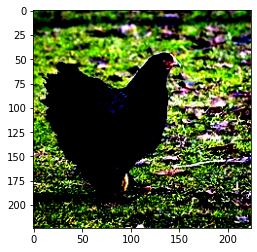

In [ ]:
img, label = train_dataset[124]
show_sample(img, label)

In [ ]:
random_seed = 42
torch.manual_seed(random_seed)

In [ ]:
len(train_dataset), len(valid_dataset), len(test_dataset)

(923, 230, 282)

In [ ]:
from torch.utils.data.dataloader import DataLoader
batch_size = 32

In [ ]:
train_dl = DataLoader(train_dataset, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(valid_dataset, batch_size*2, num_workers = 4, pin_memory = True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow = 8).permute(1, 2, 0))
        break

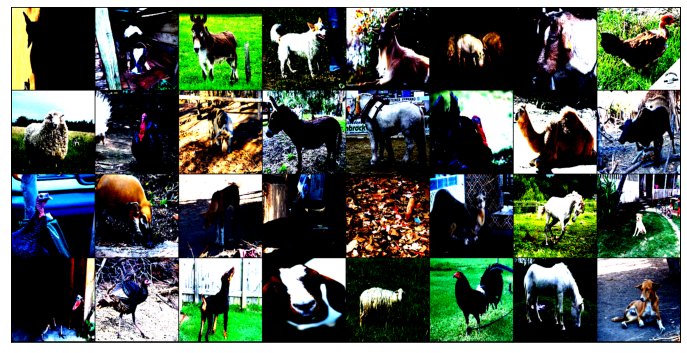

In [ ]:
show_batch(train_dl)

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch {}: train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch+1, result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
class ResNet(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet50(pretrained=True)
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, len(train_dataset.classes))
    
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))

model = ResNet()

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cpu')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device)

ResNet(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = to_device(ResNet(), device)

In [ ]:
evaluate(model, val_dl) #The tutorial example results are: {'val_loss': 5.9943437576293945, 'val_acc': 0.0029296875}

{'val_loss': 2.4251515865325928, 'val_acc': 0.05859375}

In [ ]:
num_epochs = 8
opt_func = torch.optim.Adam
lr = 5.5e-5

history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Epoch 1: train_loss: 2.1762, val_loss: 1.9293, val_acc: 0.8187
Epoch 2: train_loss: 1.8325, val_loss: 1.7699, val_acc: 0.9192
Epoch 3: train_loss: 1.6730, val_loss: 1.6923, val_acc: 0.9570
Epoch 4: train_loss: 1.6057, val_loss: 1.6523, val_acc: 0.9531
Epoch 5: train_loss: 1.5797, val_loss: 1.6430, val_acc: 0.9544
Epoch 6: train_loss: 1.5684, val_loss: 1.6325, val_acc: 0.9648
Epoch 7: train_loss: 1.5629, val_loss: 1.6276, val_acc: 0.9609
Epoch 8: train_loss: 1.5583, val_loss: 1.6234, val_acc: 0.9544


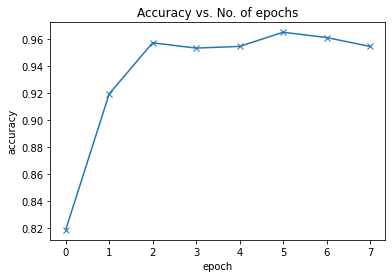

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

plot_accuracies(history)

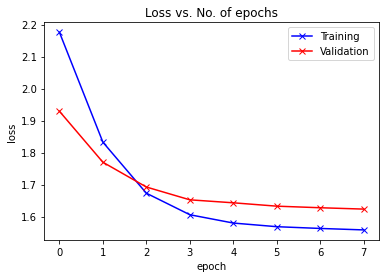

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)

Predict Images 

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    prob, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return valid_dataset.classes[preds[0].item()]

Label: cat , Predicted: cat


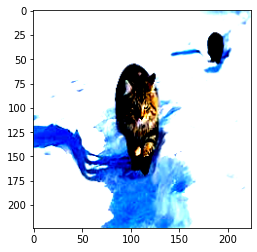

In [ ]:
img, label = test_dataset[17]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: horse , Predicted: horse


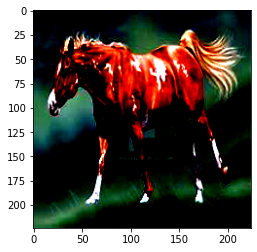

In [ ]:
img, label = test_dataset[200]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: cow , Predicted: cow


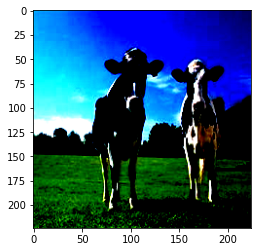

In [ ]:
img, label = test_dataset[50]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: camel , Predicted: camel


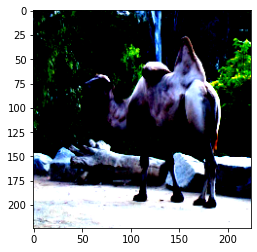

In [ ]:
img, label = test_dataset[1]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
#Save the code as html 
%%shell
jupyter nbconvert --to html /content/CAS_M3_ML.ipynb

[NbConvertApp] Converting notebook /content/CAS_M3_ML.ipynb to html
[NbConvertApp] Writing 5854920 bytes to /content/CAS_M3_ML.html


CLASSIFICATION ALGORITHM TESTING Different approaches 

https://www.kaggle.com/code/kathireshpraveen/bird-species-classification
